In [5]:
# produce log
import random
import numpy as np

def generate_log_file(log_file, num_folds=3, num_epochs=50):
    """
    生成一个符合范式的日志文件，包含随机生成的训练和验证指标数据。
    
    :param log_file: 生成的日志文件路径
    :param num_folds: Fold 数量（默认 3）
    :param num_epochs: 每个 Fold 的 Epoch 数量（默认 50）
    """
    with open(log_file, 'w') as f:
        for fold in range(1, num_folds + 1):
            # 写入 Fold 开始信息
            f.write(f"2023-10-10 12:00:00 - FOLD {fold} Start\n")
            f.write("2023-10-10 12:00:00 - --------------------------------\n")

            # 随机生成训练集和验证集的样本分布
            train_label_0 = random.randint(50, 70)
            train_label_1 = random.randint(30, 50)
            val_label_0 = random.randint(10, 20)
            val_label_1 = random.randint(5, 15)

            # 写入样本分布信息
            f.write("2023-10-10 12:00:00 - Fold 0 Distribution:\n")
            f.write("2023-10-10 12:00:00 - +-------------------+-------+-------+\n")
            f.write("2023-10-10 12:00:00 - |                   | Label 0 | Label 1 |\n")
            f.write("2023-10-10 12:00:00 - +-------------------+-------+-------+\n")
            f.write(f"2023-10-10 12:00:00 - | Train            |   {train_label_0}    |   {train_label_1}    |\n")
            f.write("2023-10-10 12:00:00 - +-------------------+-------+-------+\n")
            f.write(f"2023-10-10 12:00:00 - | Validation       |   {val_label_0}    |   {val_label_1}    |\n")
            f.write("2023-10-10 12:00:00 - +-------------------+-------+-------+\n")

            # 随机生成训练指标数据
            for epoch in range(1, num_epochs + 1):
                f.write(f"2023-10-10 12:00:00 - Epoch {epoch} ----------------------------------------------\n")
                f.write(f"2023-10-10 12:00:00 - Train Loss       : {random.uniform(0.3, 0.6):.4f}\n")
                f.write(f"2023-10-10 12:00:00 - Train Accuracy   : {random.uniform(0.7, 0.9):.4f}\n")
                f.write(f"2023-10-10 12:00:00 - Train F1 Score   : {random.uniform(0.6, 0.8):.4f}\n")
                f.write(f"2023-10-10 12:00:00 - Train Precision  : {random.uniform(0.6, 0.8):.4f}\n")
                f.write(f"2023-10-10 12:00:00 - Train Recall     : {random.uniform(0.7, 0.9):.4f}\n")
                f.write(f"2023-10-10 12:00:00 - Train Specificity: {random.uniform(0.7, 0.9):.4f}\n")

            # 随机生成验证指标数据
            f.write(f"2023-10-10 12:00:00 - Fold {fold} end\n")
            f.write(
                f"2023-10-10 12:00:00 - Fold {fold} : {random.uniform(0.8, 0.9):.4f} | "
                f"BA: {random.uniform(0.8, 0.9):.4f} | "
                f"Kappa: {random.uniform(0.7, 0.9):.4f} | "
                f"AUC: {random.uniform(0.8, 0.95):.4f} | "
                f"F1: {random.uniform(0.8, 0.9):.4f} | "
                f"Pre: {random.uniform(0.8, 0.9):.4f} | "
                f"Recall: {random.uniform(0.8, 0.9):.4f} | "
                f"Spec: {random.uniform(0.8, 0.9):.4f}\n"
            )

        # 随机生成最终结果
        f.write("2023-10-10 12:00:00 - \n")
        result_message = ''
        for metric in ['accuracy', 'balanced_accuracy', 'kappa', 'auc', 'f1', 'precision', 'recall', 'specificity']:
            avg = random.uniform(0.8, 0.9)
            std = random.uniform(0.01, 0.05)
            result_message += f"{avg * 100:.2f}±{std * 100:.2f}\t"
        f.write(f"2023-10-10 12:00:00 - {result_message}\n")

# 示例调用
generate_log_file('training.log', num_folds=3, num_epochs=50)

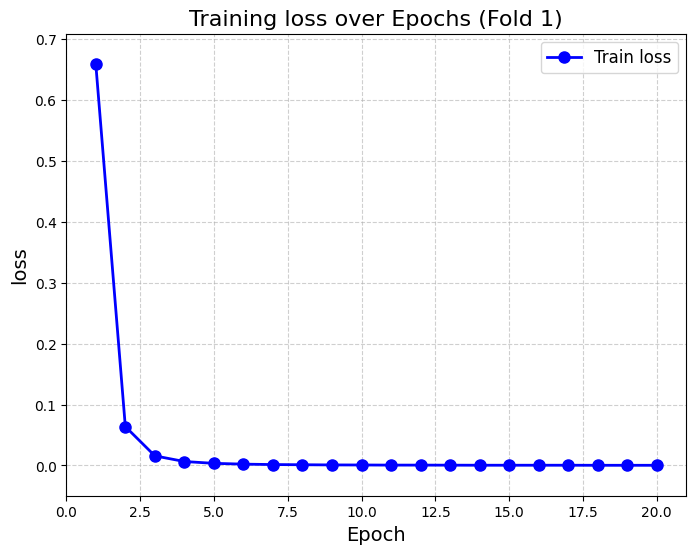

Epochs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Values: [0.6593, 0.0638, 0.0157, 0.0064, 0.0034, 0.0021, 0.0014, 0.0011, 0.0008, 0.0007, 0.0005, 0.0005, 0.0004, 0.0003, 0.0003, 0.0003, 0.0003, 0.0002, 0.0002, 0.0002]


In [7]:
import re
import matplotlib.pyplot as plt
def extract_metric_data(log_file, fold, metric):
    """
    从日志文件中提取指定 Fold 和指标的数据，并返回 Epoch 和指标值的数组。
    
    :param log_file: 日志文件路径
    :param fold: 指定的 Fold 编号（从 1 开始）
    :param metric: 指定的指标（如 'loss', 'acc', 'f1', 'precision' 等）
    :return: (epochs, values) - Epoch 数组和指标值数组
    """
    # 打开日志文件
    with open(log_file, 'r') as f:
        log_content = f.read()

    # 正则表达式匹配指定 Fold 的所有 Epoch 的指标数据
    pattern = re.compile(
        rf"Fold {fold} Start(.*?)Fold {fold} end", 
        re.DOTALL
    )
    fold_content = pattern.search(log_content)

    if not fold_content:
        raise ValueError(f"No data found for Fold {fold}.")

    # 根据指标名称调整正则表达式
    if metric.lower() == 'f1':
        # 针对 F1 score 的特殊格式
        metric_pattern = re.compile(
            rf"Epoch (\d+).*?Train F1 Score\s*:\s*([\d.]+)", 
            re.DOTALL
        )
    else:
        # 其他指标
        metric_pattern = re.compile(
            rf"Epoch (\d+).*?Train {metric.capitalize()}\s*:\s*([\d.]+)", 
            re.DOTALL
        )

    matches = metric_pattern.findall(fold_content.group(1))

    if not matches:
        raise ValueError(f"No data found for Fold {fold} and metric '{metric}'.")

    # 提取 Epoch 和指标值
    epochs = [int(match[0]) for match in matches]  # Epoch 数组
    values = [float(match[1]) for match in matches]  # 指标值数组

    plt.figure(figsize=(8, 6))  # 设置图表尺寸
    plt.plot(epochs, values, marker='o', linestyle='-', linewidth=2, markersize=8, color='b', label=f'Train {metric}')

    # 设置标题和标签
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.title(f'Training {metric} over Epochs (Fold {fold})', fontsize=16)

    # 设置网格线
    plt.grid(True, linestyle='--', alpha=0.6)

    # 设置横坐标和纵坐标范围
    plt.xlim(left=0, right=max(epochs) + 1)  # 横坐标从 0 开始
    plt.ylim(bottom=min(values) - 0.05, top=max(values) + 0.05)  # 纵坐标范围

    # 添加图例
    plt.legend(fontsize=12)

    # # 保存图表
    # if save_path:
    #     plt.savefig(save_path, dpi=300, bbox_inches='tight')  # 高分辨率保存
    #     print(f"Plot saved to {save_path}")

    # 显示图表
    plt.show()
    
    return epochs, values

# 示例调用
epochs, values = extract_metric_data('./logs/NCvsPD/ResNet18_20250102_212735_69.05.log', fold=1, metric='loss')
print("Epochs:", epochs)
print("Values:", values)

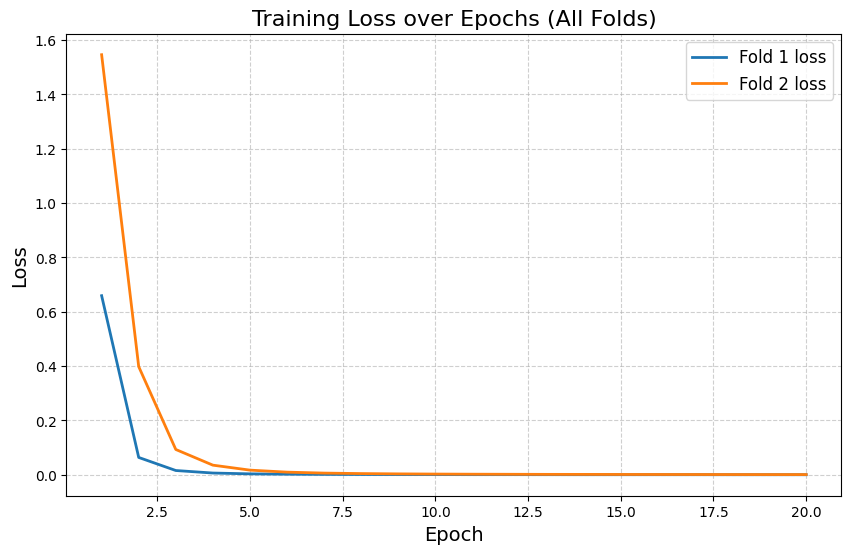

In [9]:
import re
import matplotlib.pyplot as plt

def extract_and_plot_all_folds(log_file, metric):
    """
    从日志文件中提取所有 Fold 的指定指标数据，并绘制在同一张图上。
    
    :param log_file: 日志文件路径
    :param metric: 指定的指标（如 'loss', 'acc', 'f1', 'precision' 等）
    """
    # 打开日志文件
    with open(log_file, 'r') as f:
        log_content = f.read()

    # 正则表达式匹配所有 Fold 的内容
    fold_pattern = re.compile(
        r"Fold (\d+) Start(.*?)Fold \1 end", 
        re.DOTALL
    )
    fold_matches = fold_pattern.findall(log_content)

    if not fold_matches:
        raise ValueError("No fold data found in the log file.")

    # 创建图表
    plt.figure(figsize=(10, 6))

    # 遍历每个 Fold
    for fold, fold_content in fold_matches:
        # 根据指标名称调整正则表达式
        if metric.lower() == 'f1':
            # 针对 F1 score 的特殊格式
            metric_pattern = re.compile(
                rf"Epoch (\d+).*?Train F1 Score\s*:\s*([\d.]+)", 
                re.DOTALL
            )
        else:
            # 其他指标
            metric_pattern = re.compile(
                rf"Epoch (\d+).*?Train {metric.capitalize()}\s*:\s*([\d.]+)", 
                re.DOTALL
            )

        matches = metric_pattern.findall(fold_content)

        if not matches:
            print(f"No data found for Fold {fold} and metric '{metric}'.")
            continue

        # 提取 Epoch 和指标值
        epochs = [int(match[0]) for match in matches]  # Epoch 数组
        values = [float(match[1]) for match in matches]  # 指标值数组

        # 绘制曲线
        plt.plot(epochs, values, linestyle='-', linewidth=2, label=f'Fold {fold} {metric}')

    # 设置标题和标签
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel(metric.capitalize(), fontsize=14)
    plt.title(f'Training {metric.capitalize()} over Epochs (All Folds)', fontsize=16)

    # 设置网格线
    plt.grid(True, linestyle='--', alpha=0.6)

    # 添加图例
    plt.legend(fontsize=12)

    # 显示图表
    plt.show()

# 示例调用
extract_and_plot_all_folds('./logs/NCvsPD/ResNet18_20250102_212735_69.05.log', metric='loss')

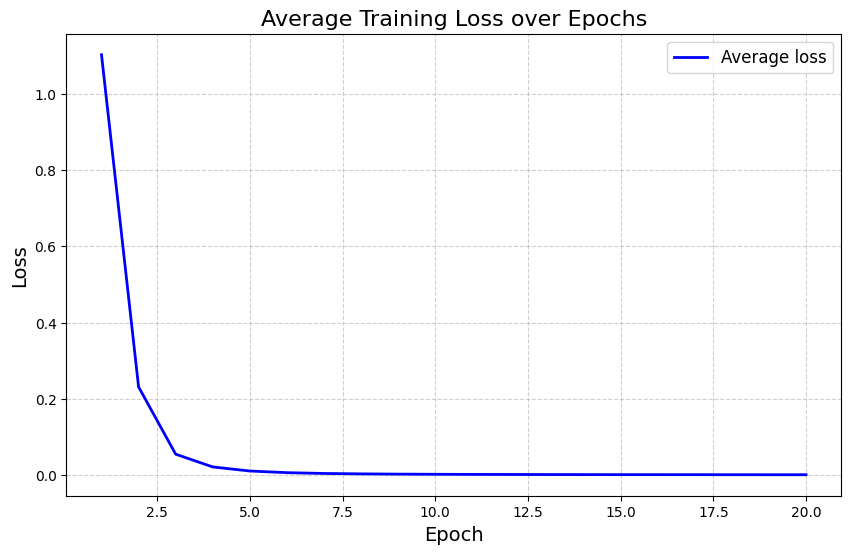

In [12]:
import re
import numpy as np
import matplotlib.pyplot as plt

def plot_average_metric(log_file, metric):
    """
    从日志文件中提取所有 Fold 的指定指标数据，计算平均值，并绘制平均曲线。
    
    :param log_file: 日志文件路径
    :param metric: 指定的指标（如 'loss', 'acc', 'f1', 'precision' 等）
    """
    # 打开日志文件
    with open(log_file, 'r') as f:
        log_content = f.read()

    # 正则表达式匹配所有 Fold 的内容
    fold_pattern = re.compile(
        r"Fold (\d+) Start(.*?)Fold \1 end", 
        re.DOTALL
    )
    fold_matches = fold_pattern.findall(log_content)

    if not fold_matches:
        raise ValueError("No fold data found in the log file.")

    # 存储所有 Fold 的指标数据
    all_values = []
    max_epochs = 0

    # 遍历每个 Fold
    for fold, fold_content in fold_matches:
        # 根据指标名称调整正则表达式
        if metric.lower() == 'f1':
            # 针对 F1 score 的特殊格式
            metric_pattern = re.compile(
                rf"Epoch (\d+).*?Train F1 Score\s*:\s*([\d.]+)", 
                re.DOTALL
            )
        else:
            # 其他指标
            metric_pattern = re.compile(
                rf"Epoch (\d+).*?Train {metric.capitalize()}\s*:\s*([\d.]+)", 
                re.DOTALL
            )

        matches = metric_pattern.findall(fold_content)

        if not matches:
            print(f"No data found for Fold {fold} and metric '{metric}'.")
            continue

        # 提取 Epoch 和指标值
        epochs = [int(match[0]) for match in matches]  # Epoch 数组
        values = [float(match[1]) for match in matches]  # 指标值数组

        # 更新最大 Epoch 数量
        max_epochs = max(max_epochs, len(epochs))

        # 存储当前 Fold 的指标值
        all_values.append(values)

    # 如果没有任何 Fold 的数据，直接返回
    if not all_values:
        print(f"No valid data found for metric '{metric}'.")
        return

    # 计算每个 Epoch 的平均值
    avg_values = np.zeros(max_epochs)
    for values in all_values:
        # 如果当前 Fold 的 Epoch 数量不足，用最后一个值填充
        if len(values) < max_epochs:
            values.extend([values[-1]] * (max_epochs - len(values)))
        avg_values += np.array(values)
    avg_values /= len(all_values)

    # 创建图表
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_epochs + 1), avg_values, linestyle='-', linewidth=2, color='b', label=f'Average {metric}')

    # 设置标题和标签
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel(metric.capitalize(), fontsize=14)
    plt.title(f'Average Training {metric.capitalize()} over Epochs', fontsize=16)

    # 设置网格线
    plt.grid(True, linestyle='--', alpha=0.6)

    # 添加图例
    plt.legend(fontsize=12)

    # 显示图表
    plt.show()

# 示例调用
plot_average_metric('./logs/NCvsPD/ResNet18_20250102_212735_69.05.log', metric='loss')